In [15]:
# standard library
import sys

# pydata stack
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import svm

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

/tmp/ipykernel_39/344948990.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [16]:
print(f'Python version: {sys.version}')
print(f'pandas version: {pd.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'scikit-learn: {sklearn.__version__}')

Python version: 3.9.12 (main, Apr  5 2022, 06:56:58) 
[GCC 7.5.0]
pandas version: 1.5.2
seaborn version: 0.12.2
scikit-learn: 1.2.0


---

## Load Dataset

In [17]:
iris = pd.read_csv('data/iris.csv')

---

## Explore with Pandas

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  92 non-null     float64
 1   sepal_width   92 non-null     float64
 2   petal_length  92 non-null     float64
 3   petal_width   92 non-null     float64
 4   species       92 non-null     object 
dtypes: float64(4), object(1)
memory usage: 3.7+ KB


In [19]:
iris['species'] = iris['species'].astype('category')

In [20]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  92 non-null     float64 
 1   sepal_width   92 non-null     float64 
 2   petal_length  92 non-null     float64 
 3   petal_width   92 non-null     float64 
 4   species       92 non-null     category
dtypes: category(1), float64(4)
memory usage: 3.2 KB


In [21]:
values = ['count', 'min', 'max', 'mean', 'std']
iris.groupby(by='species').agg(values)

sepal_length                            sepal_width            \
                  count  min  max   mean       std       count  min  max   
species                                                                    
setosa               50  4.3  5.8  5.006  0.352490          50  2.3  4.4   
versicolor           42  4.9  7.0  6.000  0.516555          42  2.0  3.4   

                               petal_length                               \
                mean       std        count  min  max     mean       std   
species                                                                    
setosa      3.418000  0.381024           50  1.0  1.9  1.46400  0.173511   
versicolor  2.780952  0.327770           42  3.3  5.1  4.32619  0.442311   

           petal_width                                
                 count  min  max      mean       std  
species                                               
setosa              50  0.1  0.6  0.244000  0.107210  
versicolor          42  1.0  1.8  1.347619  0.203911

---

## Visualization

<AxesSubplot: ylabel='Frequency'>

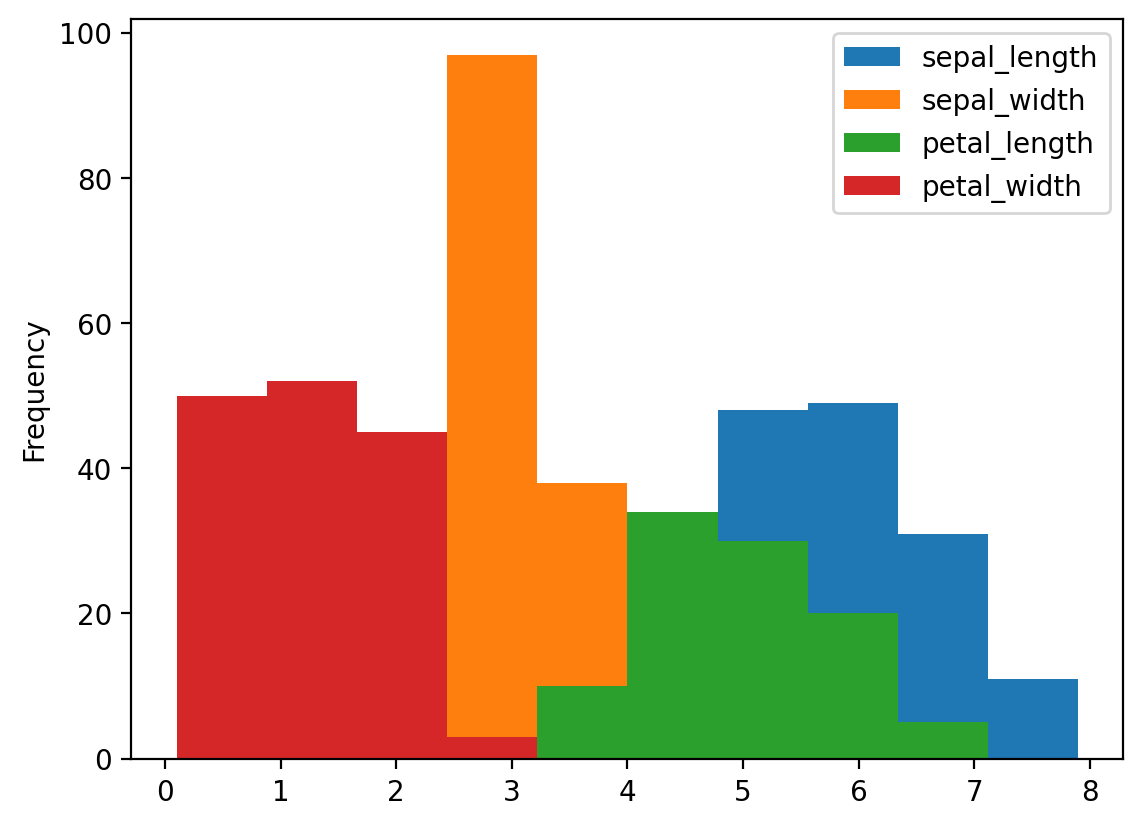

In [9]:
iris.plot.hist()

In [10]:
iris['sepal_length'].plot.hist(by='species')

KeyError: 'species'

<AxesSubplot: ylabel='Frequency'>

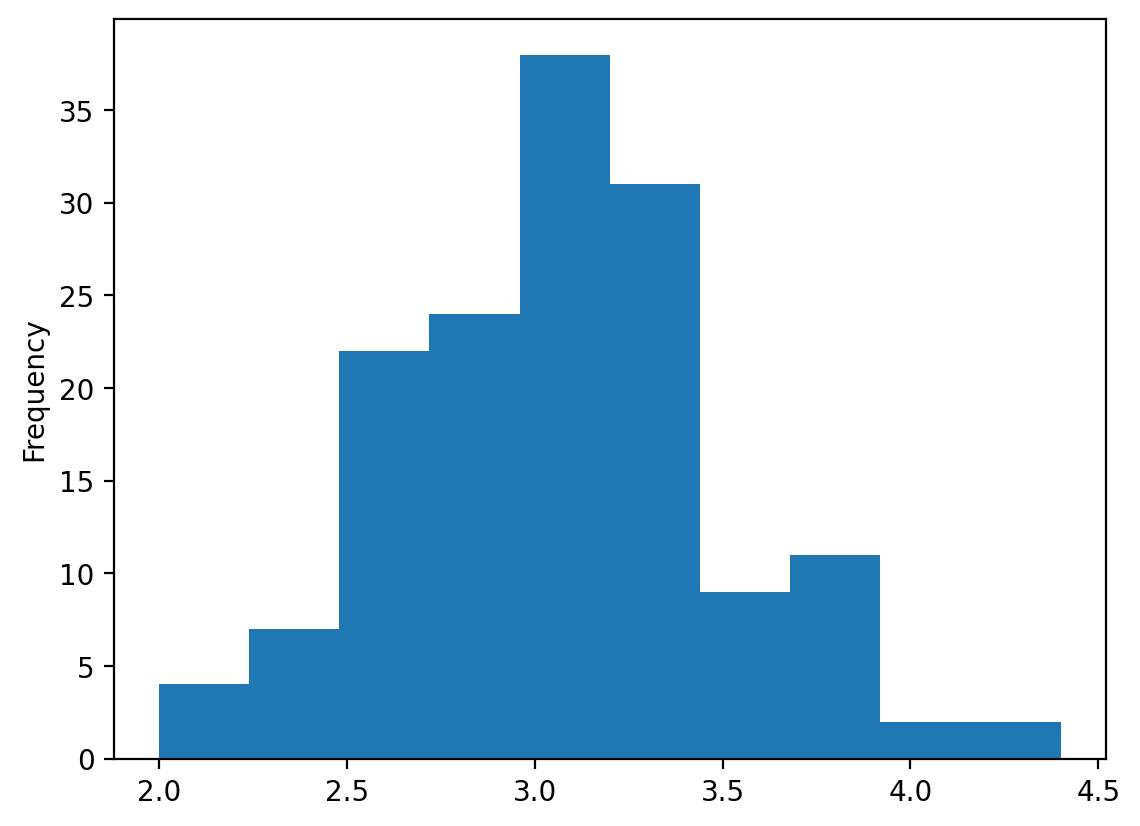

In [11]:
iris['sepal_width'].plot.hist()

<AxesSubplot: ylabel='Frequency'>

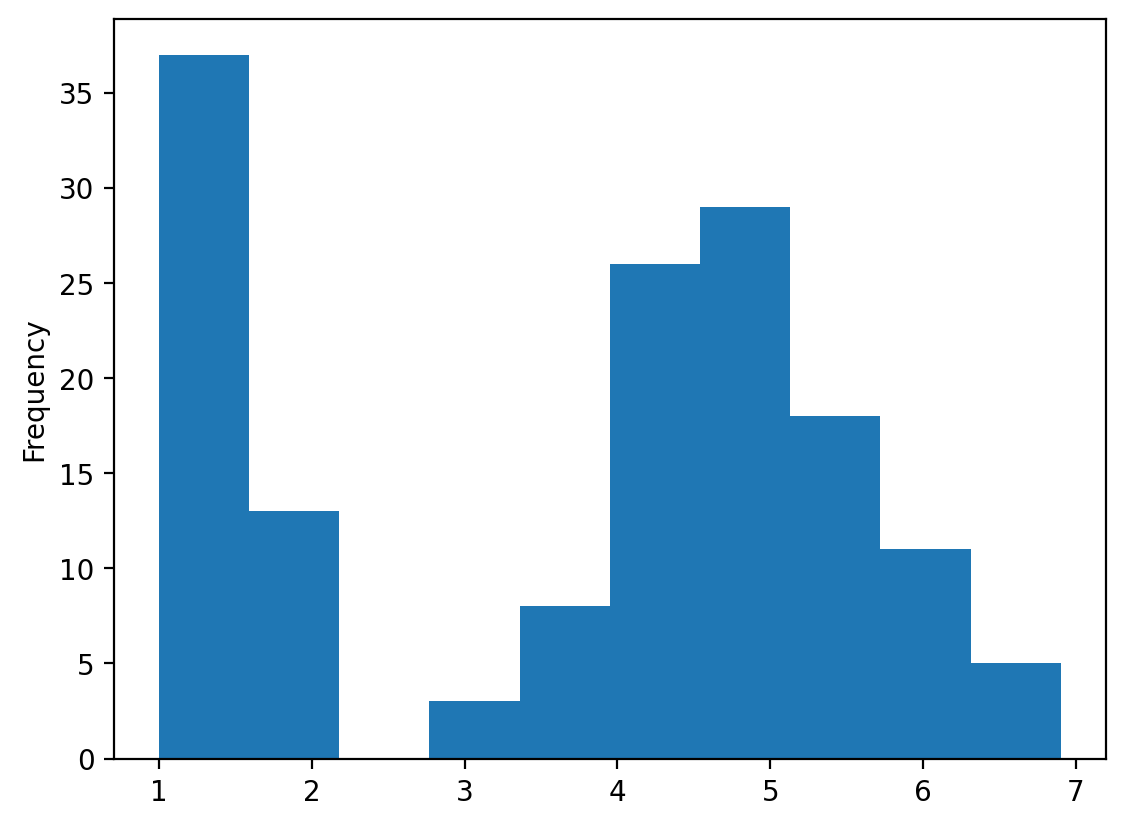

In [12]:
iris['petal_length'].plot.hist()

<AxesSubplot: ylabel='Frequency'>

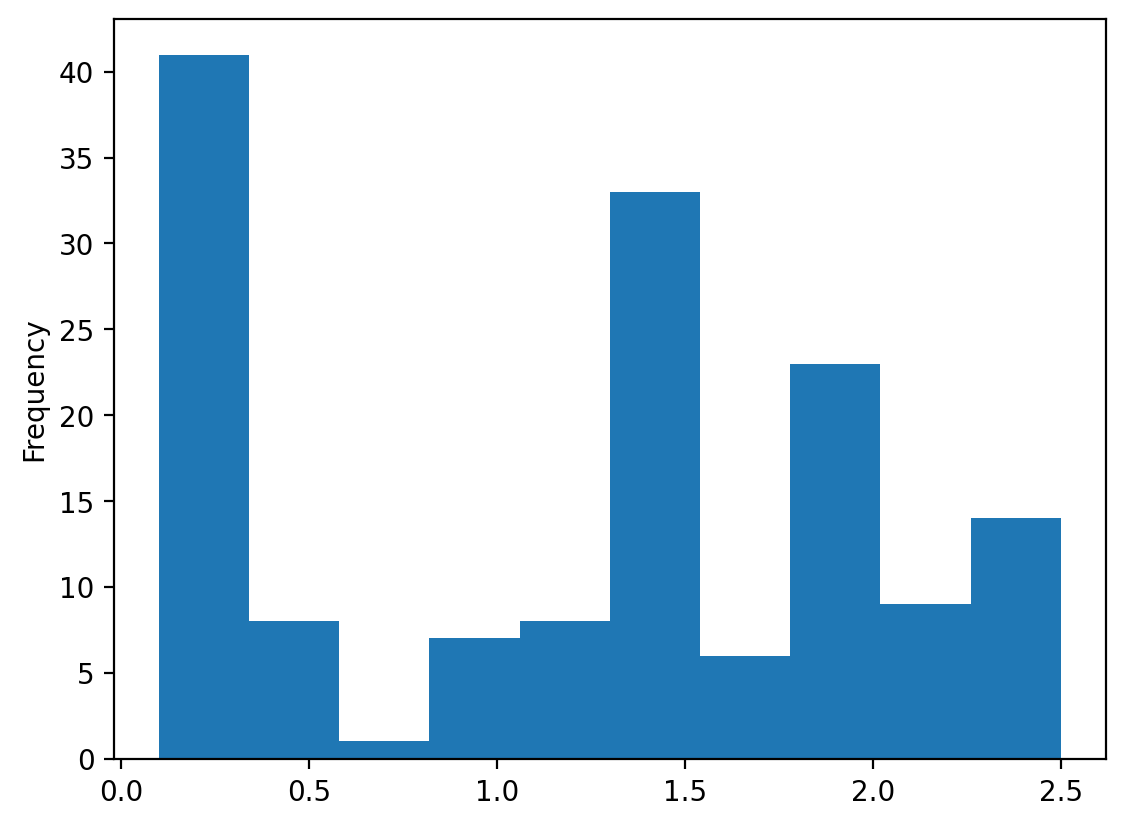

In [13]:
iris['petal_width'].plot.hist()

---

array([[<AxesSubplot: title={'center': 'petal_length'}, xlabel='[species]'>,
        <AxesSubplot: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

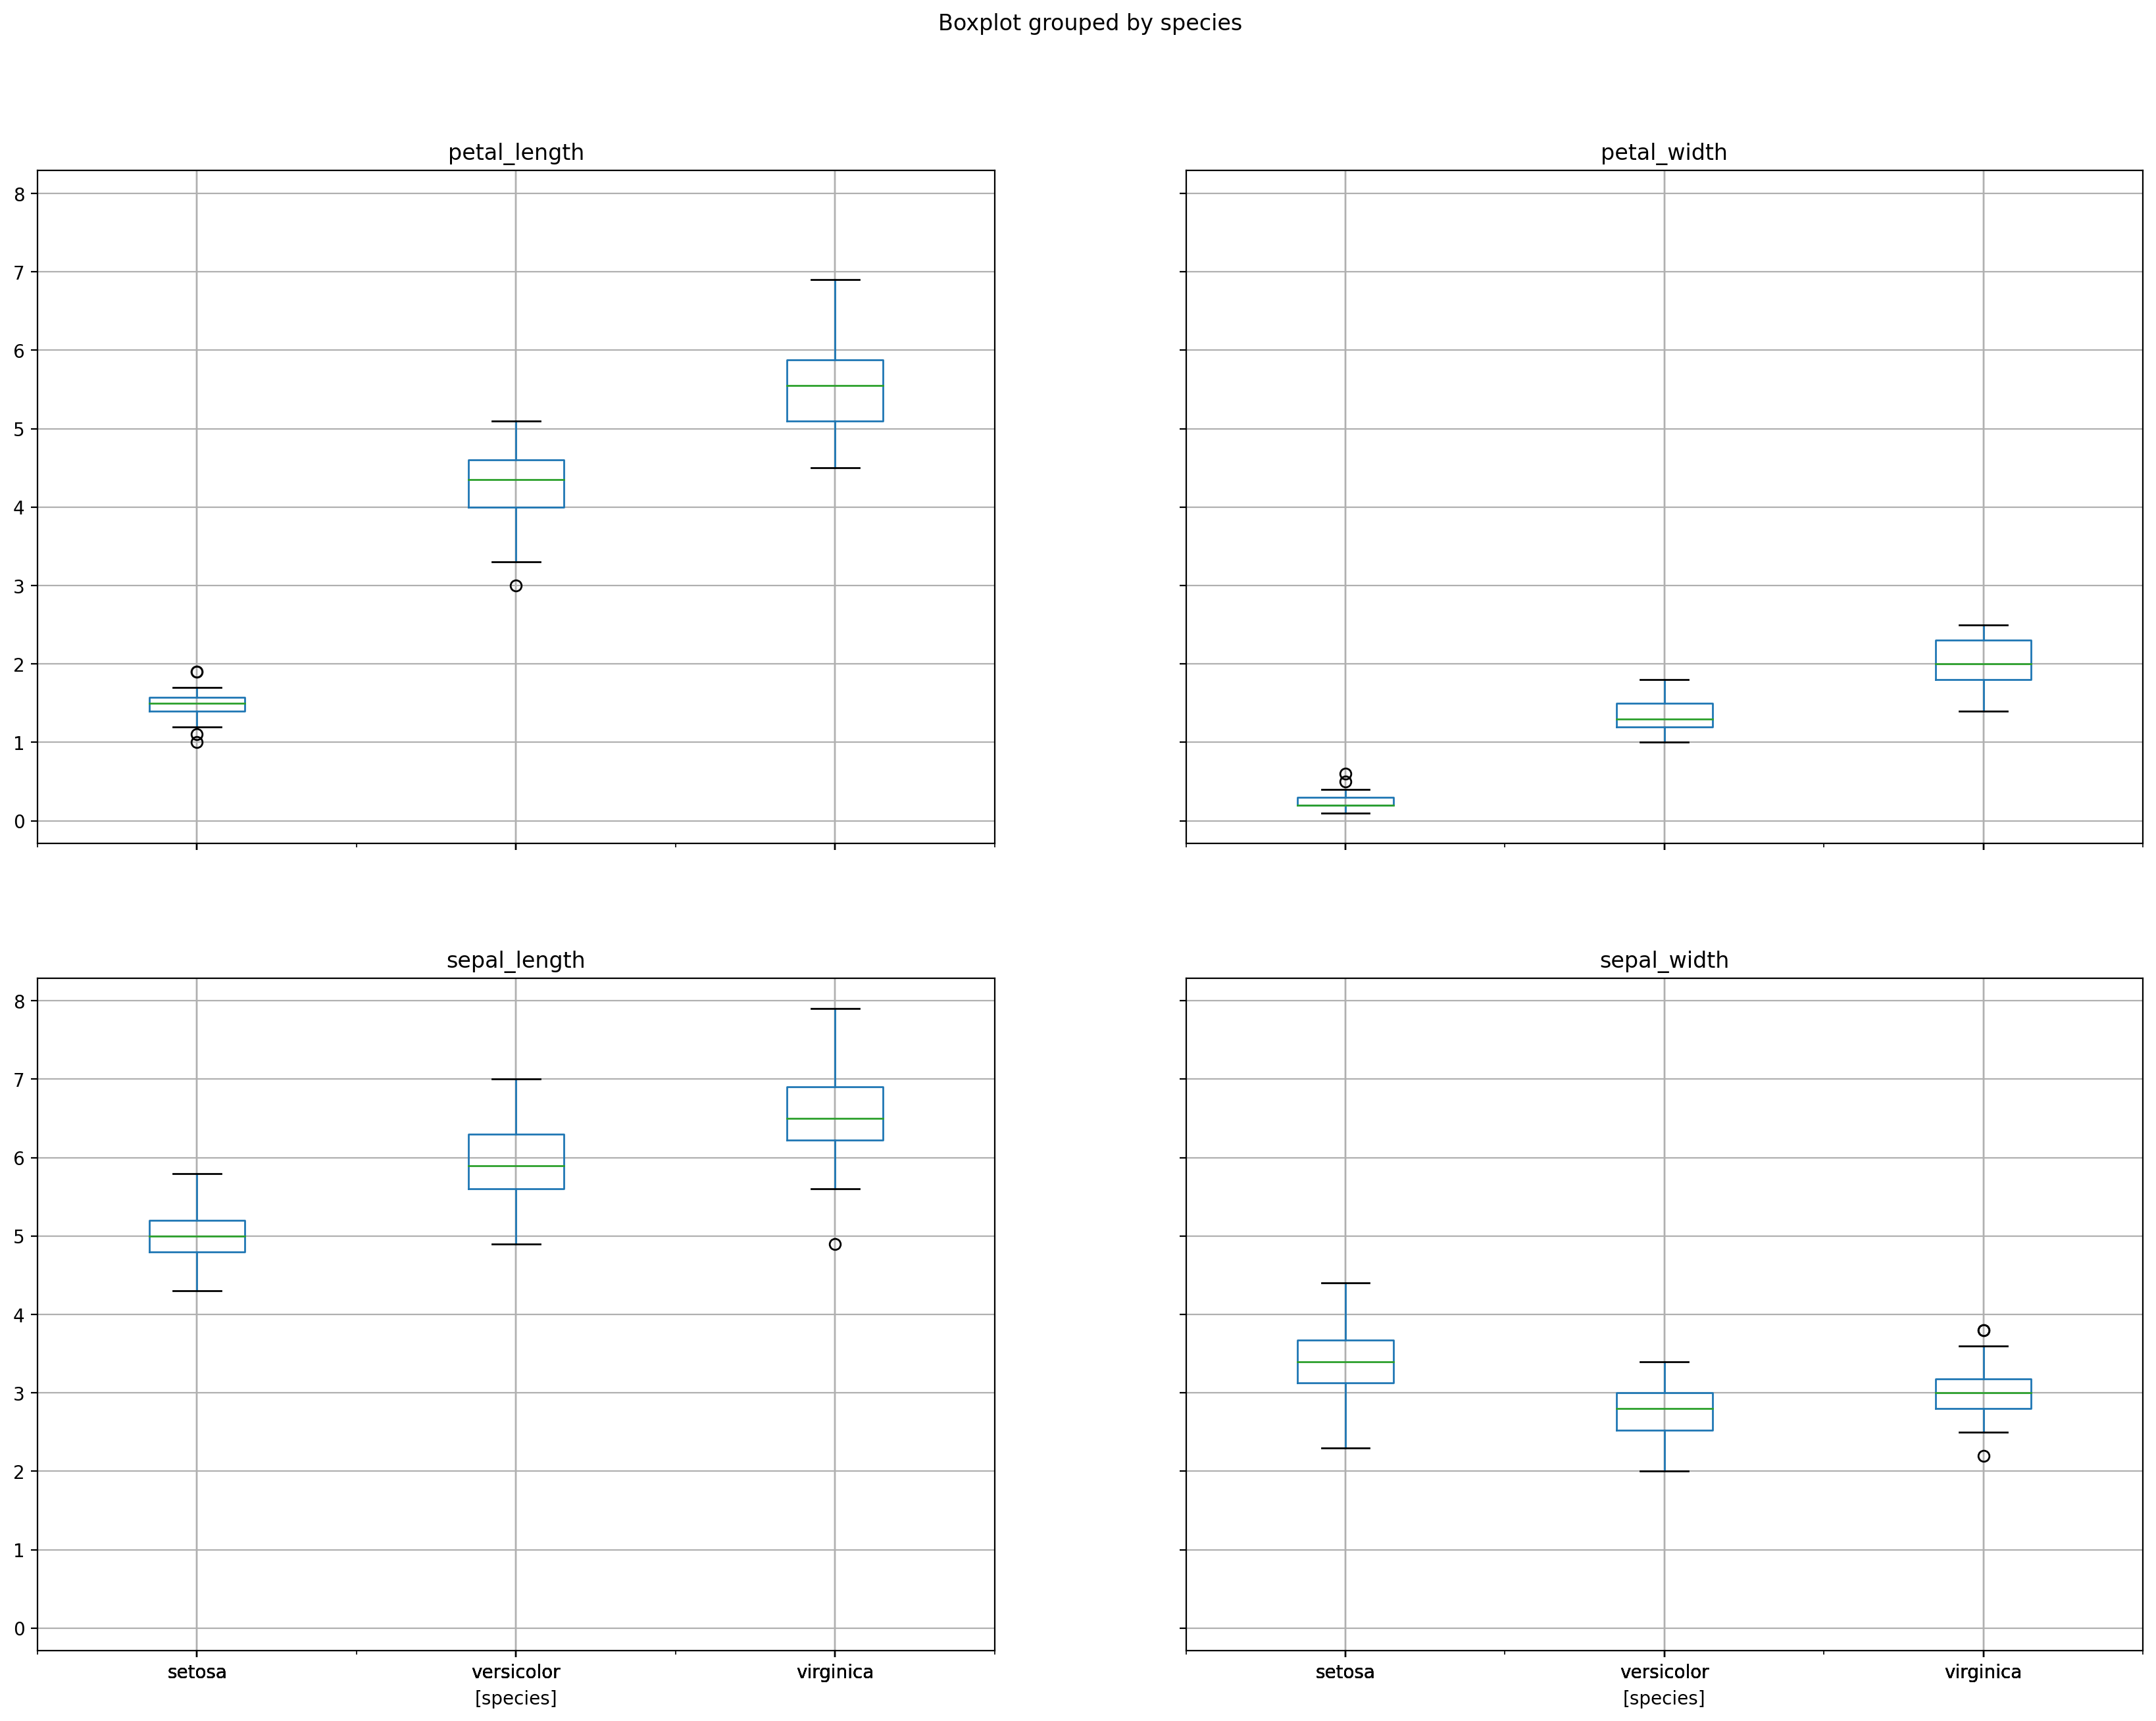

In [14]:
iris.boxplot(by='species', figsize=(20, 15))

---

## Multidimensional Plots

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
scatter_matrix(iris, figsize=(12, 12), diagonal='kde')

In [ ]:
from pandas.plotting import andrews_curves

In [ ]:
plt.figure(figsize=(10, 10))
andrews_curves(iris, 'species')

In [ ]:
from pandas.plotting import parallel_coordinates

In [ ]:
plt.figure(figsize=(10, 10))
parallel_coordinates(iris, 'species')

In [ ]:
from pandas.plotting import radviz

In [ ]:
plt.figure(figsize=(10, 10))
radviz(iris, 'species')

---

## Seaborn Visualization

In [ ]:
sns.set(color_codes=True)

### Distributions

In [ ]:
sns.distplot(iris['sepal_width'])

In [ ]:
sns.distplot(iris['sepal_width'],
             hist=True,
             kde=True,
             rug=True,
             bins=5)

In [ ]:
# Kernel Density Estimate... can specify the kind f kernel
sns.kdeplot(iris['sepal_width'],
            shade=True,
            kernel='gau',
            bw=.13)

In [ ]:
from scipy import stats

In [ ]:
sns.distplot(iris['petal_width'],
             hist=True,
             kde=True,
             fit=stats.expon) ## pass in random variable object

In [ ]:
# Jointplot (bivariate distributions)
sns.jointplot(data=iris,
              x='sepal_length',
              y='sepal_width',
              kind='scatter')

In [ ]:
# pairwise relationship
sns.pairplot(iris,
             hue='species')

In [ ]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot, shade=True)
g.map_offdiag(sns.kdeplot, cmap="Blues_r", n_levels=5)

### Categorical Data

In [ ]:
iris['above_sepal_width_mean'] = iris['sepal_width'] > iris['sepal_width'].mean()

#### Scatterplot

In [ ]:
sns.stripplot(data=iris,
              x='species',
              y='sepal_width',
              hue='above_sepal_width_mean',
              jitter=True)

#### Distributions

In [ ]:
sns.violinplot(data=iris,
               x='species',
               y='sepal_width',
               hue='above_sepal_width_mean',
               inner='box')

---

## Build and plot Support Vector Machine classifers

Adapted from [sklearn docs](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html)

In [ ]:
# convert to sklearn format, grab first 2 columns
X = np.array(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])[:, :2]

# convert strings to categorical
le = sklearn.preprocessing.LabelEncoder()
le.fit(iris['species'])
y = le.transform(iris['species'])

In [ ]:
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = sklearn.svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = sklearn.svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = sklearn.svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = sklearn.svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()